# CASE STUDY : Implement a KNN model to classify the animals into categories


K Nearest Neighbor algorithm
-----

- K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.
- K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.
- K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.
- K-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification problems.
- K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data.
- It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.

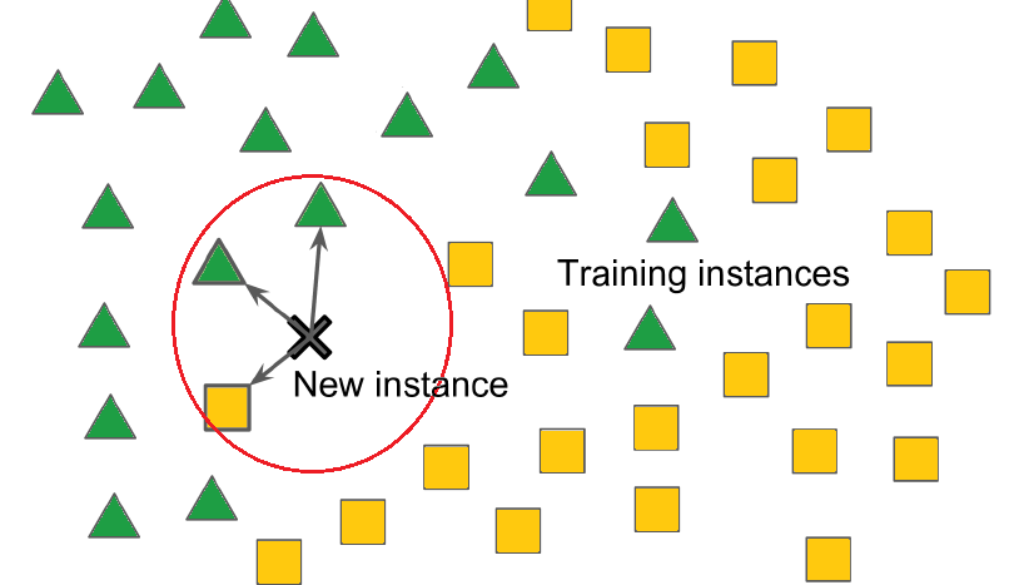

Procedure
----
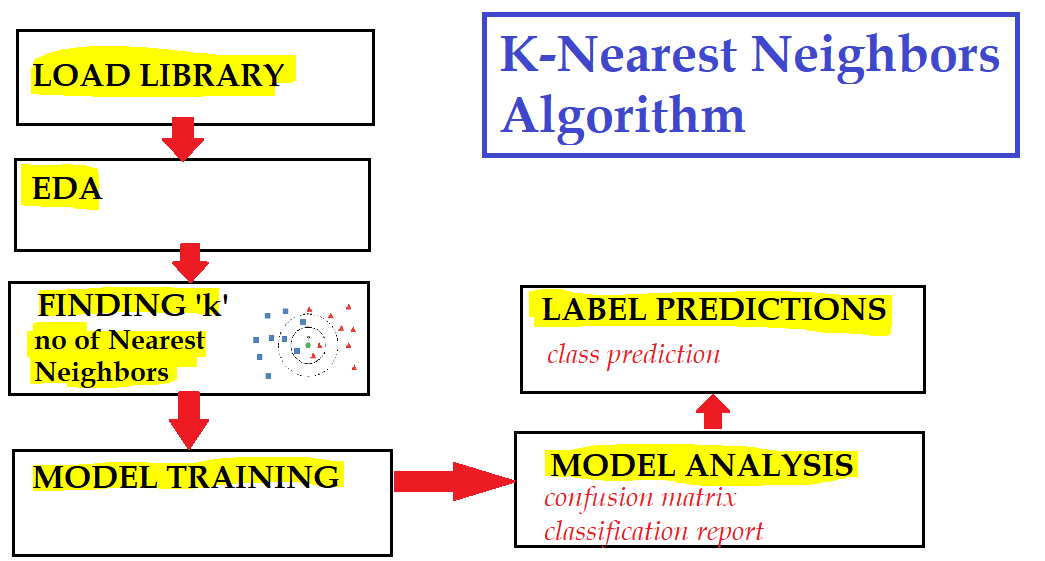



In [1]:
# Import Libraries

#SET 1 : DATA MANIPULATION AND ANALYSIS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import plot as off
import plotly.figure_factory as ff
import plotly.io as pio

#SET 2 : DATA PREPROCESSING
from sklearn.preprocessing import StandardScaler

#SET 3 : ML SPECIFIC
from sklearn.neighbors import KNeighborsClassifier

#SET 4 : ML EVALUATION SPECIFIC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score,train_test_split


In [2]:
#SET 5 : MISC
# Ignoring Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
'''#SET 6 : GOOGLE COLLAB SPECIFIC
from google.colab import files
file=files.upload()'''

Saving Zoo.csv to Zoo.csv


In [4]:
# Import Dataset
zoo = pd.read_csv('Zoo.csv')
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


DATA DICTIONARY
---

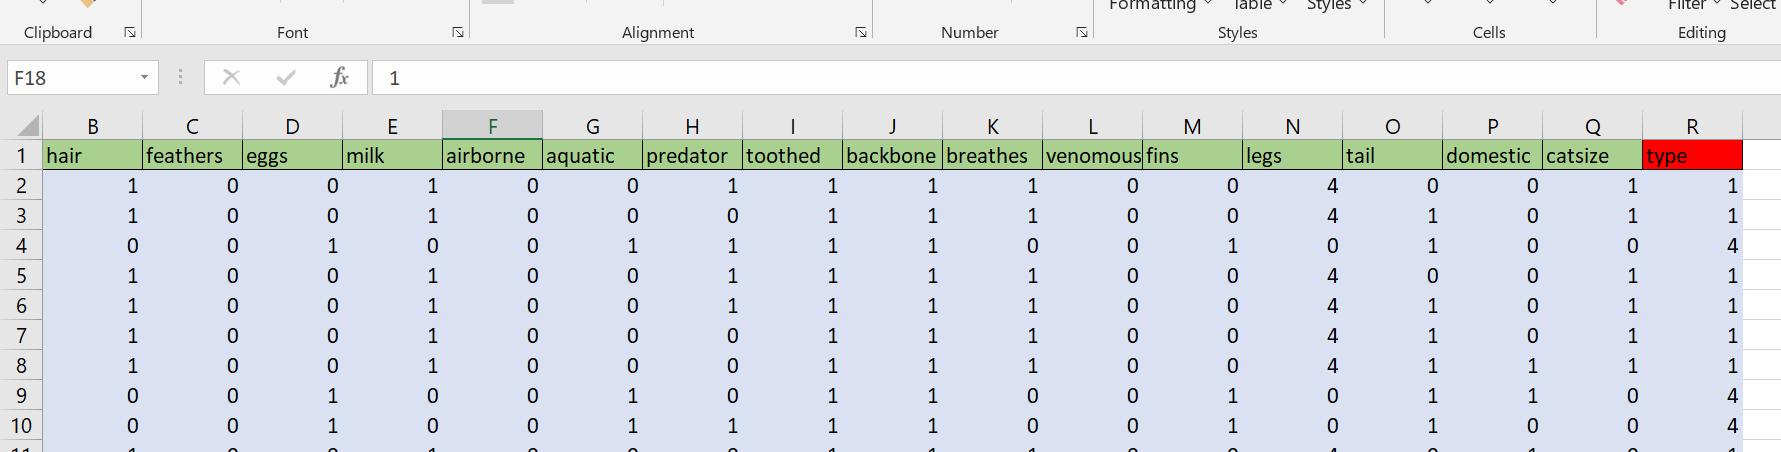

# EDA

- data dictionary
- data cleaning
- variable analysis
- univariate analysis
- multivariate analysis
- correlation analysis
- statistical analysis
- required tranformations

DataSet analysis
----

- data size
- data type
- data shape

In [42]:
zoo.shape

(101, 17)

conclusion

- no of observations = 101
- no of features = 17

In [43]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      101 non-null    int64
 1   feathers  101 non-null    int64
 2   eggs      101 non-null    int64
 3   milk      101 non-null    int64
 4   airborne  101 non-null    int64
 5   aquatic   101 non-null    int64
 6   predator  101 non-null    int64
 7   toothed   101 non-null    int64
 8   backbone  101 non-null    int64
 9   breathes  101 non-null    int64
 10  venomous  101 non-null    int64
 11  fins      101 non-null    int64
 12  legs      101 non-null    int64
 13  tail      101 non-null    int64
 14  domestic  101 non-null    int64
 15  catsize   101 non-null    int64
 16  type      101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB


DATA CLEANING
----

- missing/null values
- duplicates

Missing Values

In [5]:
zoo.isnull().any()

animal name    False
hair           False
feathers       False
eggs           False
milk           False
airborne       False
aquatic        False
predator       False
toothed        False
backbone       False
breathes       False
venomous       False
fins           False
legs           False
tail           False
domestic       False
catsize        False
type           False
dtype: bool

In [6]:
zoo.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

conclusion : We have no missing data so all the entries are valid for use.



Duplicated Values

In [9]:
zoo[zoo.duplicated()]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


##### There are no duplicate values in our data

STATISTICAL ANALYSIS
----
- mean
- mode
- median
- range
- variance
- standard deviation

In [10]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [11]:
list(zoo)

['animal name',
 'hair',
 'feathers',
 'eggs',
 'milk',
 'airborne',
 'aquatic',
 'predator',
 'toothed',
 'backbone',
 'breathes',
 'venomous',
 'fins',
 'legs',
 'tail',
 'domestic',
 'catsize',
 'type']

 - all of the animal characteristics or feature values are given as binary values (1- present / 0-absent) except for the legs

- where it is given as a count of legs.



In [13]:
zoo.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [14]:
zoo['type'].unique()

array([1, 4, 2, 7, 6, 5, 3])

RESPONE VARIABLE ANALYSIS (TYPE)
----

Text(0.5, 1.0, 'COUNTPLOT FOR TYPE')

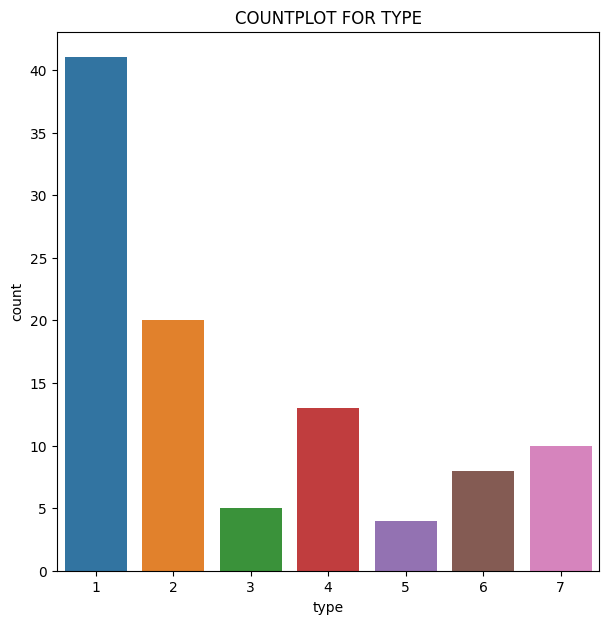

In [15]:
# Plot histogram of types
plt.rcParams['figure.figsize'] = (7,7)
sns.countplot(x='type',data=zoo )
ax = plt.gca()
ax.set_title("COUNTPLOT FOR TYPE")

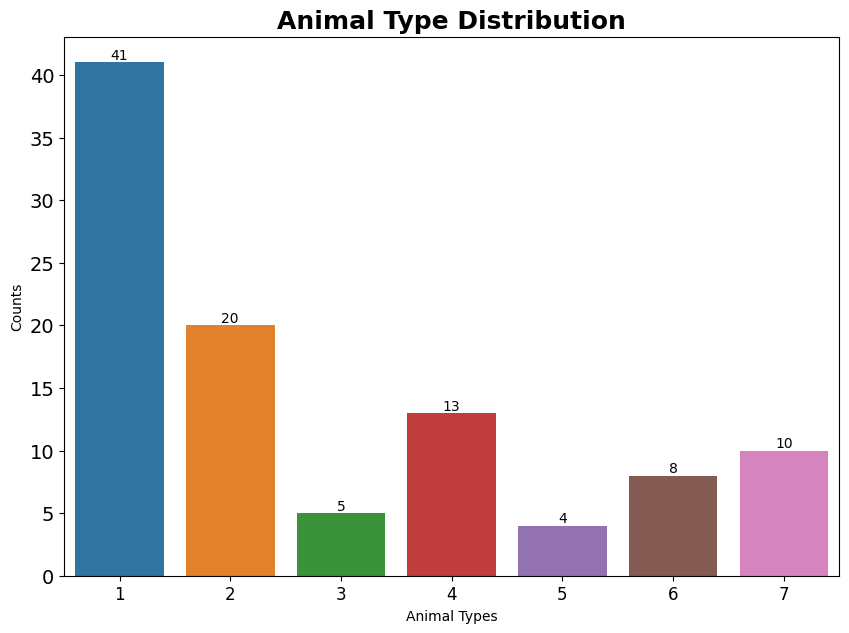

In [16]:
plt.figure(figsize = (10,7))
ax = sns.barplot(x = zoo['type'].value_counts().index.tolist(), y = zoo['type'].value_counts().tolist())
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks( fontsize = 12)
plt.title("Animal Type Distribution",  fontsize = 18, fontweight = 'bold')
plt.xlabel('Animal Types')
plt.ylabel('Counts')
for i in ax.containers:
    ax.bar_label(i,)

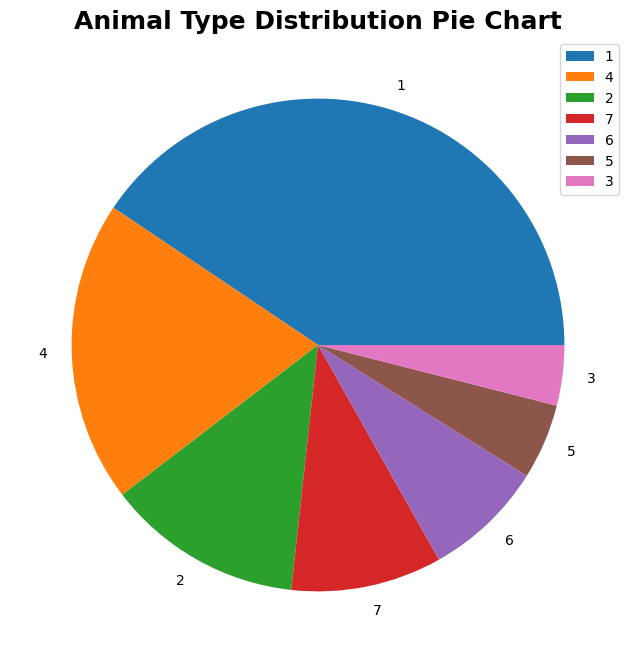

In [17]:
plt.figure(figsize = (12,8))
plt.pie(zoo['type'].value_counts(),
       labels=zoo.type.unique())
plt.legend(loc= 'upper right')
plt.title("Animal Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

<Axes: xlabel='legs', ylabel='count'>

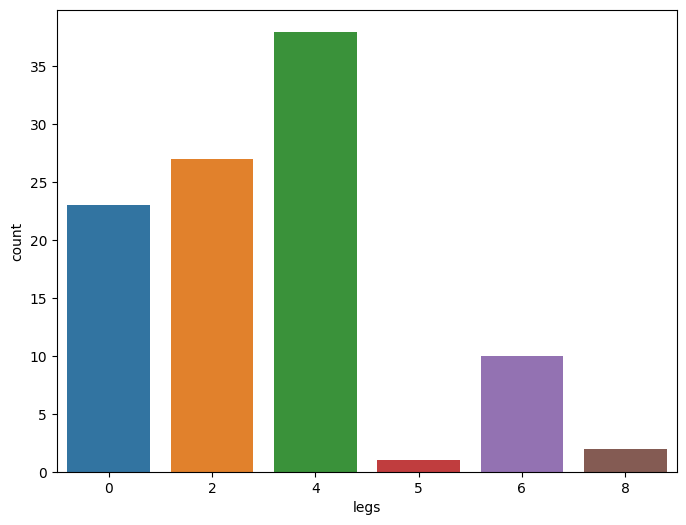

In [18]:
#countplot for animal feature (legs)

fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(data=zoo,x="legs")

+ Most of the animals have 4 legs
+ Least number of animals have 5 legs

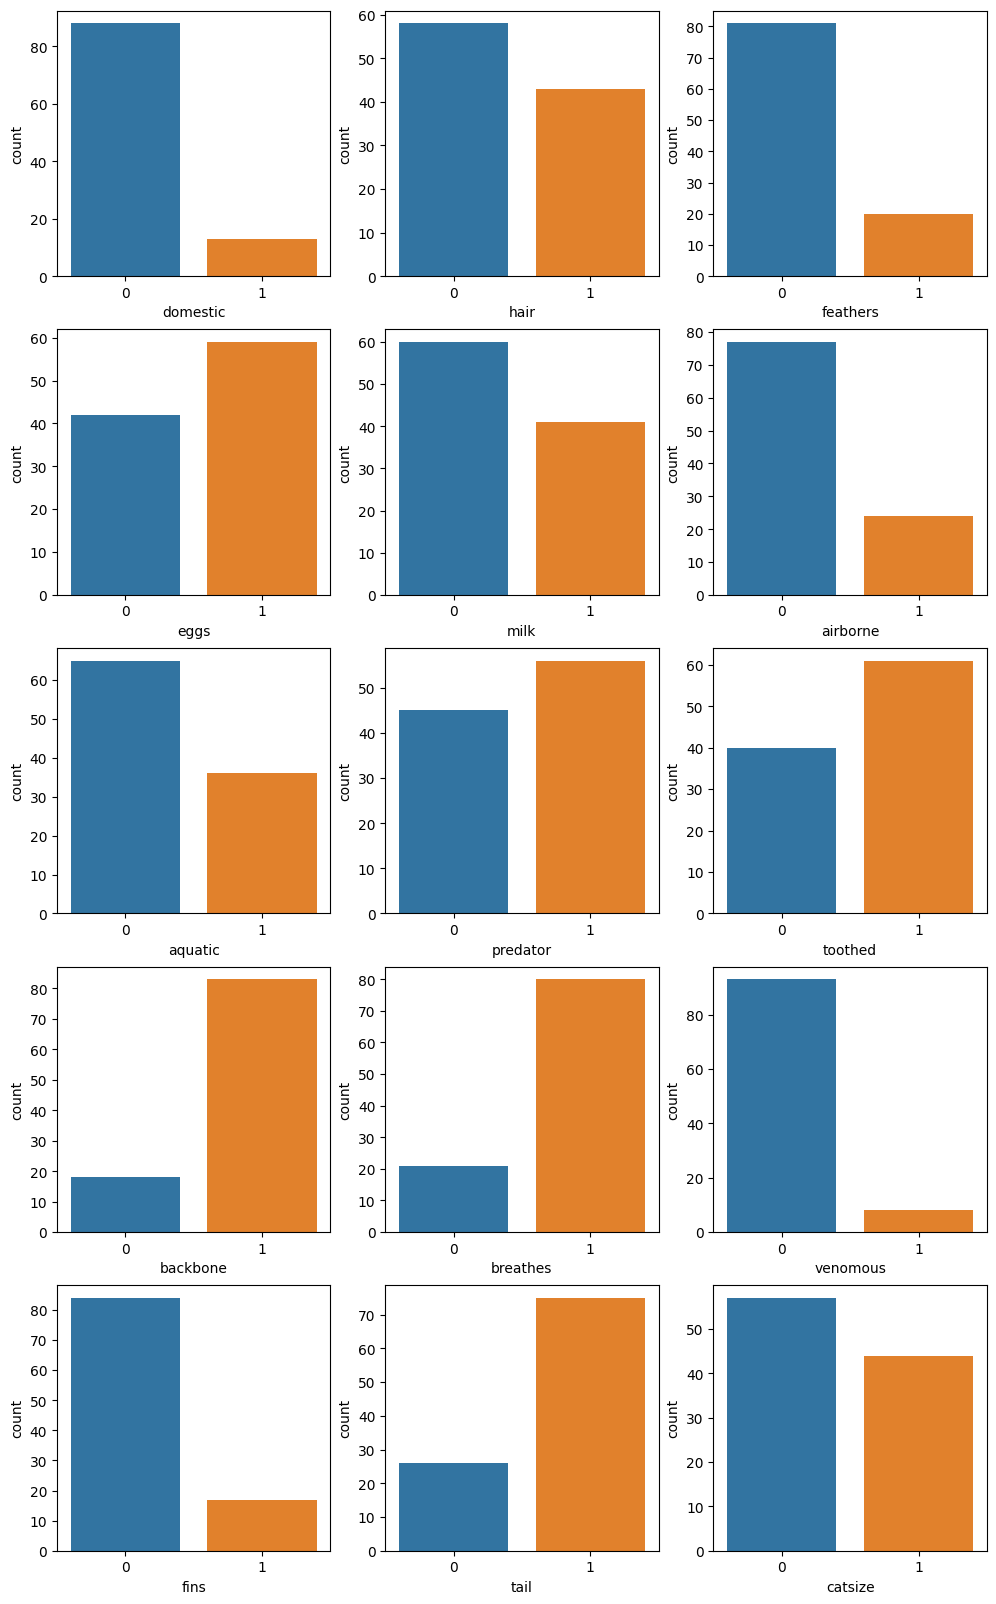

In [19]:
#count plot for each features

fig, ax =plt.subplots(5,3, figsize=(12,20))

sns.countplot(data=zoo,x="domestic", ax=ax[0,0])
sns.countplot(data=zoo,x="hair", ax=ax[0,1])
sns.countplot(data=zoo,x="feathers", ax=ax[0,2])

sns.countplot(data=zoo,x="eggs",  ax=ax[1,0])
sns.countplot(data=zoo,x="milk",  ax=ax[1,1])
sns.countplot(data=zoo,x="airborne",  ax=ax[1,2])

sns.countplot(data=zoo,x="aquatic",  ax=ax[2,0])
sns.countplot(data=zoo,x="predator",  ax=ax[2,1])
sns.countplot(data=zoo,x="toothed",  ax=ax[2,2])

sns.countplot(data=zoo,x="backbone",  ax=ax[3,0])
sns.countplot(data=zoo,x="breathes",  ax=ax[3,1])
sns.countplot(data=zoo,x="venomous",  ax=ax[3,2])

sns.countplot(data=zoo,x="fins",  ax=ax[4,0])
sns.countplot(data=zoo,x="tail",  ax=ax[4,1])
sns.countplot(data=zoo,x="catsize", ax=ax[4,2]);

CORREALTION ANALYSIS
-----

<Axes: >

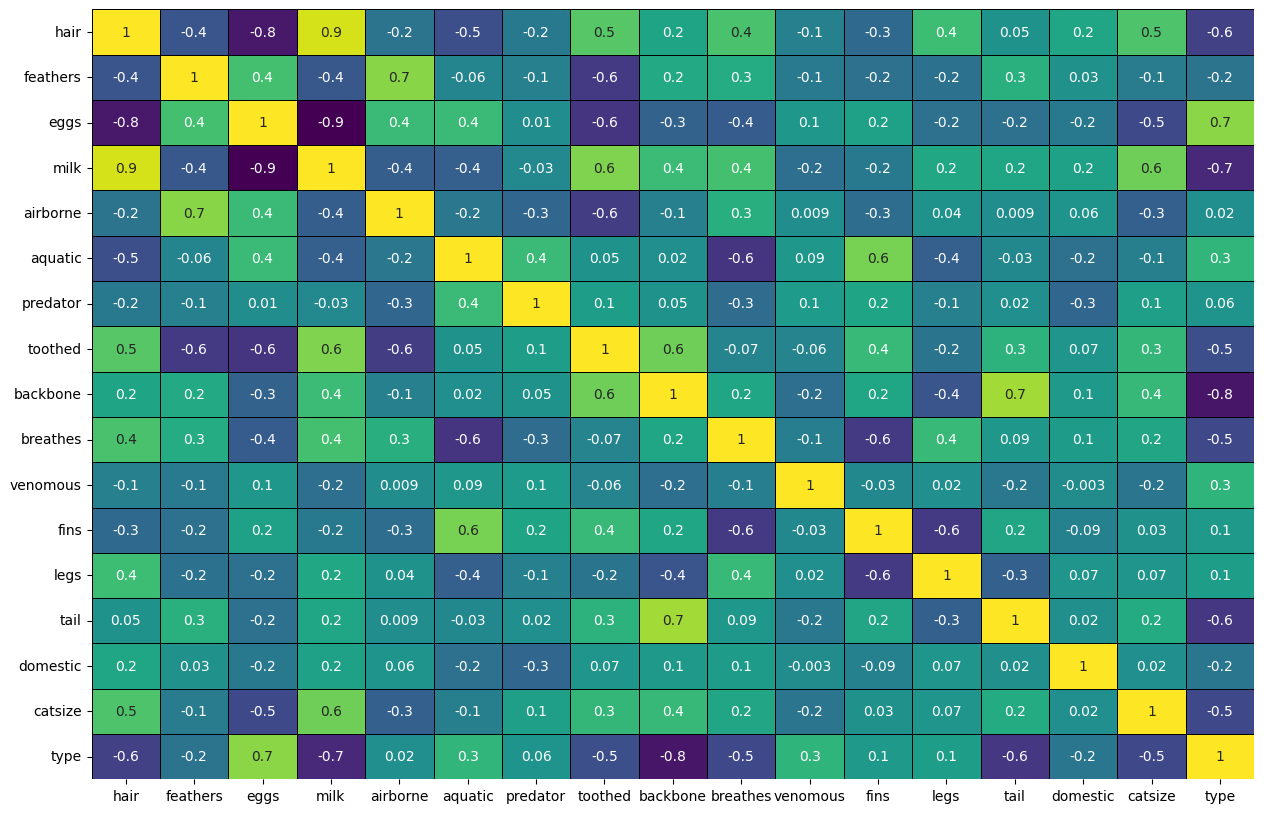

In [45]:
# correlation matrix

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(zoo.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black')

# Data Pre-Processing

In [20]:
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [21]:
zoo.drop(['animal name'], axis=1, inplace=True)

In [22]:
zoo.head(1)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1


Feature Selection
----

In [23]:
x = zoo.drop('type',axis=1)
y = zoo[['type']]

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [25]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (70, 16)
Shape of X_test:  (31, 16)
Shape of y_train:  (70, 1)
Shape of y_test (31, 1)


#HYPERPARAMETER TUNING FOR  K



selecting a optimal K value on the model

- Larger K value: The case of underfitting occurs when the value of k is increased. In this case, the model would be unable to correctly learn on the training data.

- Smaller k value: The condition of overfitting occurs when the value of k is smaller. The model will capture all of the training data, including noise. The model will perform poorly for the test data in this scenario.



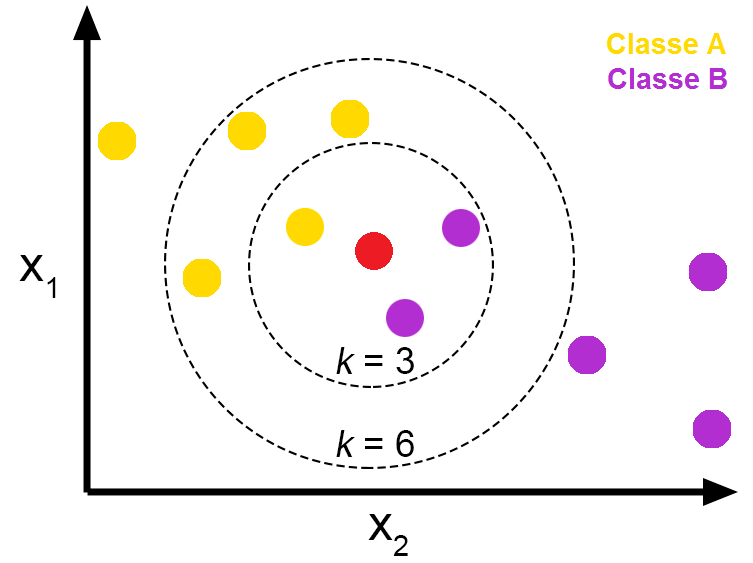

Grid search for choosing the optimal Value of K
----

In [46]:
# Get score for different values of n
k_list = np.arange(1, 40, 2)
mean_scores = []
accuracy_list = []
error_rate = []

for i in k_list:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    pred_i = pred_i.reshape(31,1)
    score = cross_val_score(knn,x_train, y_train,cv=10)
    mean_scores.append(np.mean(score))
    error_rate.append(np.mean(pred_i != y_test))

In [47]:
n_neighbors = np.array([2*i+1 for i in range(1,20)])
param_grid = dict(n_neighbors=n_neighbors)
n_neighbors

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39])

Grid Training

In [28]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv =10)
grid.fit(x, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39])})

In [29]:
print(grid.best_score_)
print(grid.best_params_)

0.95
{'n_neighbors': 3}


NOTE 🇮

- It is recommended to always select an odd value of K

- When the value of K is set to even, a situation may arise in which the elements from both groups are equal.

- In this condition, the model would be unable to do the correct classification for you. Here the model will randomly assign any of the two classes to this new unknown data.



Visualizing the CV results

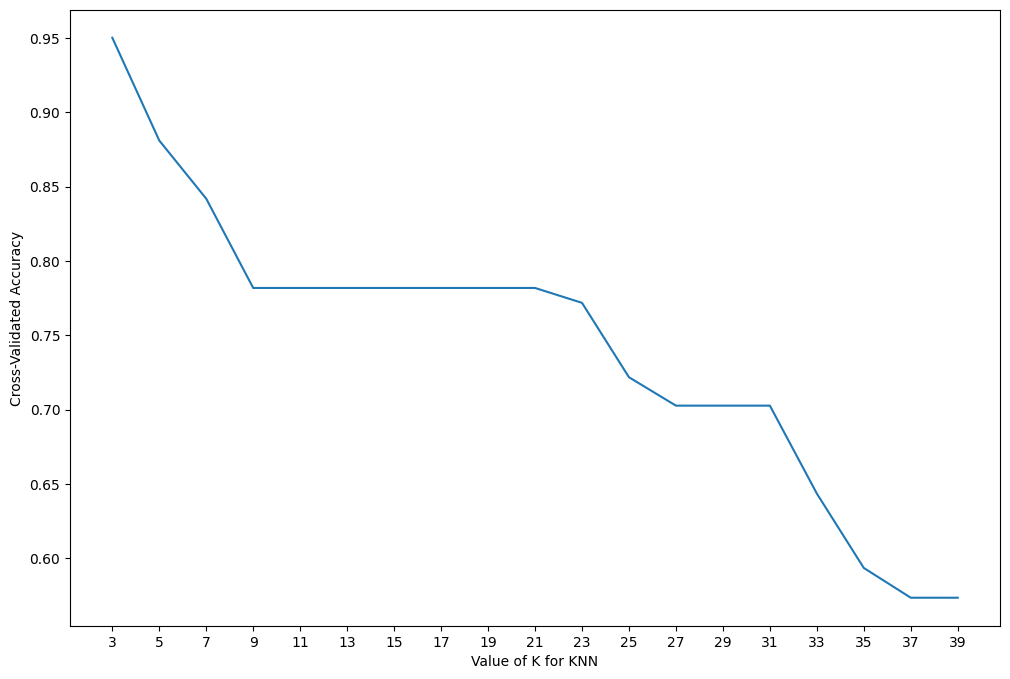

In [30]:
# choose k between 1 to 40
k_range = np.array([2*i+1 for i in range(1,20)])
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.figure(figsize=(12,8))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.show()

In [31]:
pd.DataFrame(k_scores).sort_values(0,ascending=False).head(10)

,0
0,0.950000
1,0.880909
2,0.841818
6,0.781818
8,0.781818
7,0.781818
9,0.781818
5,0.781818
4,0.781818
3,0.781818


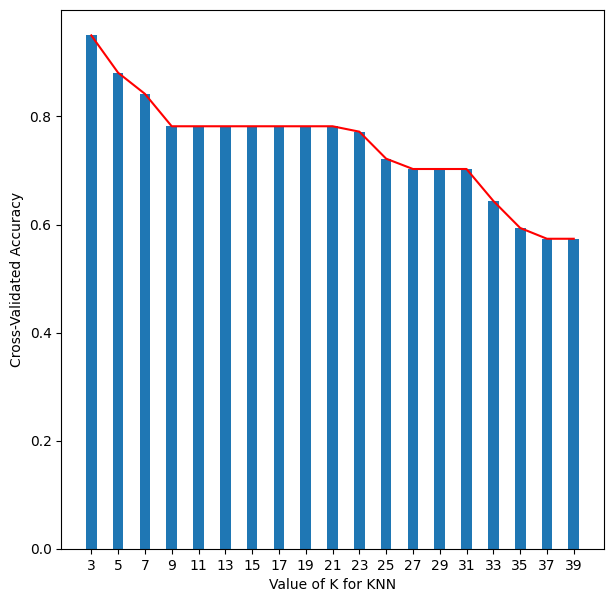

<Figure size 1200x800 with 0 Axes>

In [32]:
# choose k between 1 to 20
k_range = [2*i+1 for i in range(1,20)]
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores, color='red')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.figure(figsize=(12,8))
plt.show()

Text(0, 0.5, 'Error Rate')

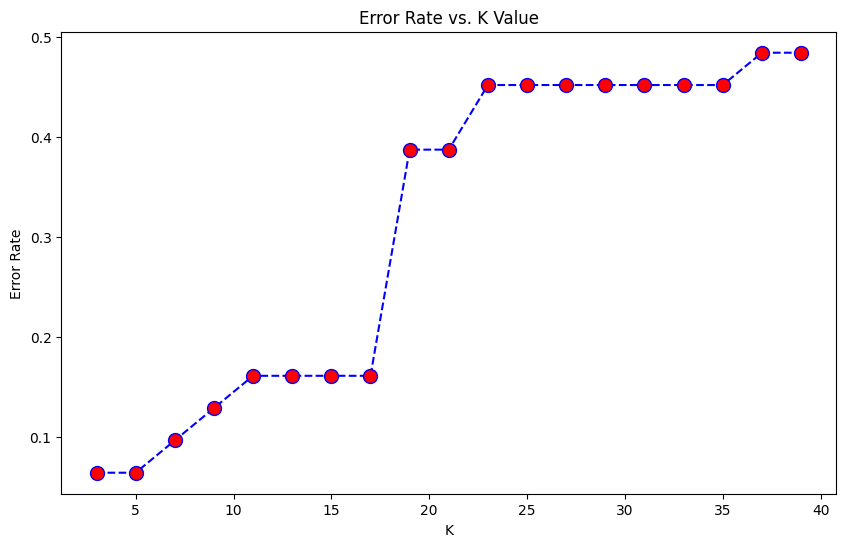

In [33]:
error_rate = []

# Will take some time
k_range = [i for i in range(3,40, 2)]
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    pred_i = pred_i.reshape(31,1)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot([i for i in range(3,40, 2)],error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after K>3 the error rate just tends to hover around 0 to 0.5

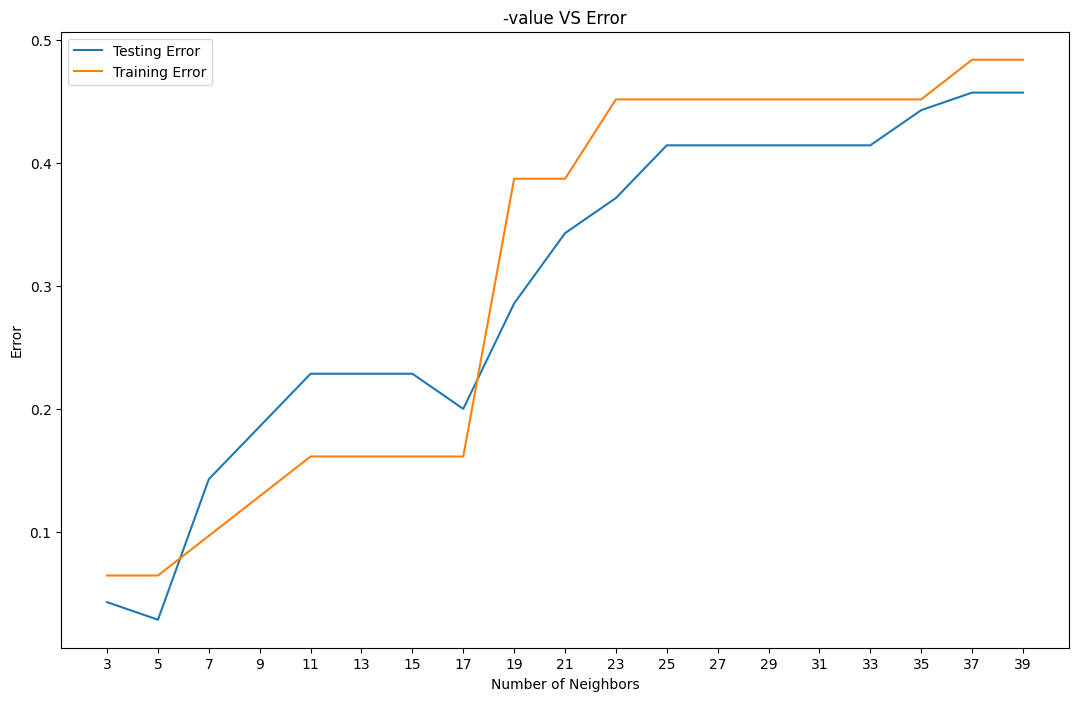

In [34]:
error1= []
error2= []
k_range = [i for i in range(3,40, 2)]
for k in k_range:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred1= knn.predict(x_train)
    y_pred1 = y_pred1.reshape(70,1)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(x_test)
    y_pred2 = y_pred2.reshape(31,1)
    error2.append(np.mean(y_test!= y_pred2))
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_range, error1, label = 'Testing Error')
plt.plot(k_range, error2, label = 'Training Error')
plt.legend()
plt.title('-value VS Error')
plt.xlabel('Number of Neighbors')
plt.ylabel('Error')
plt.xticks(k_range)
plt.show()

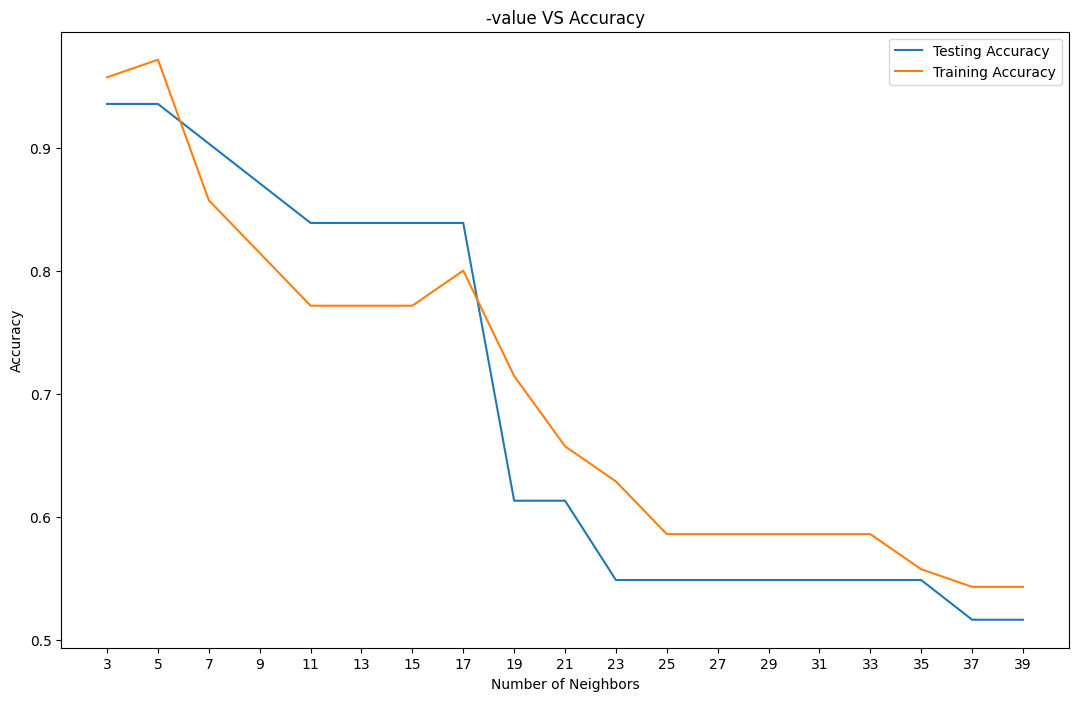

In [35]:
train_accuracy = []
test_accuracy = []

k_range = [i for i in range(3,40, 2)]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train,y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test,y_test))
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_range, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_range, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.savefig('graph.png')
plt.show()

conclsuion
 - The best value of K is 3
 - preparing classification report for analysis

# MODEL ANALYSIS

- confusion matrix
- classification report

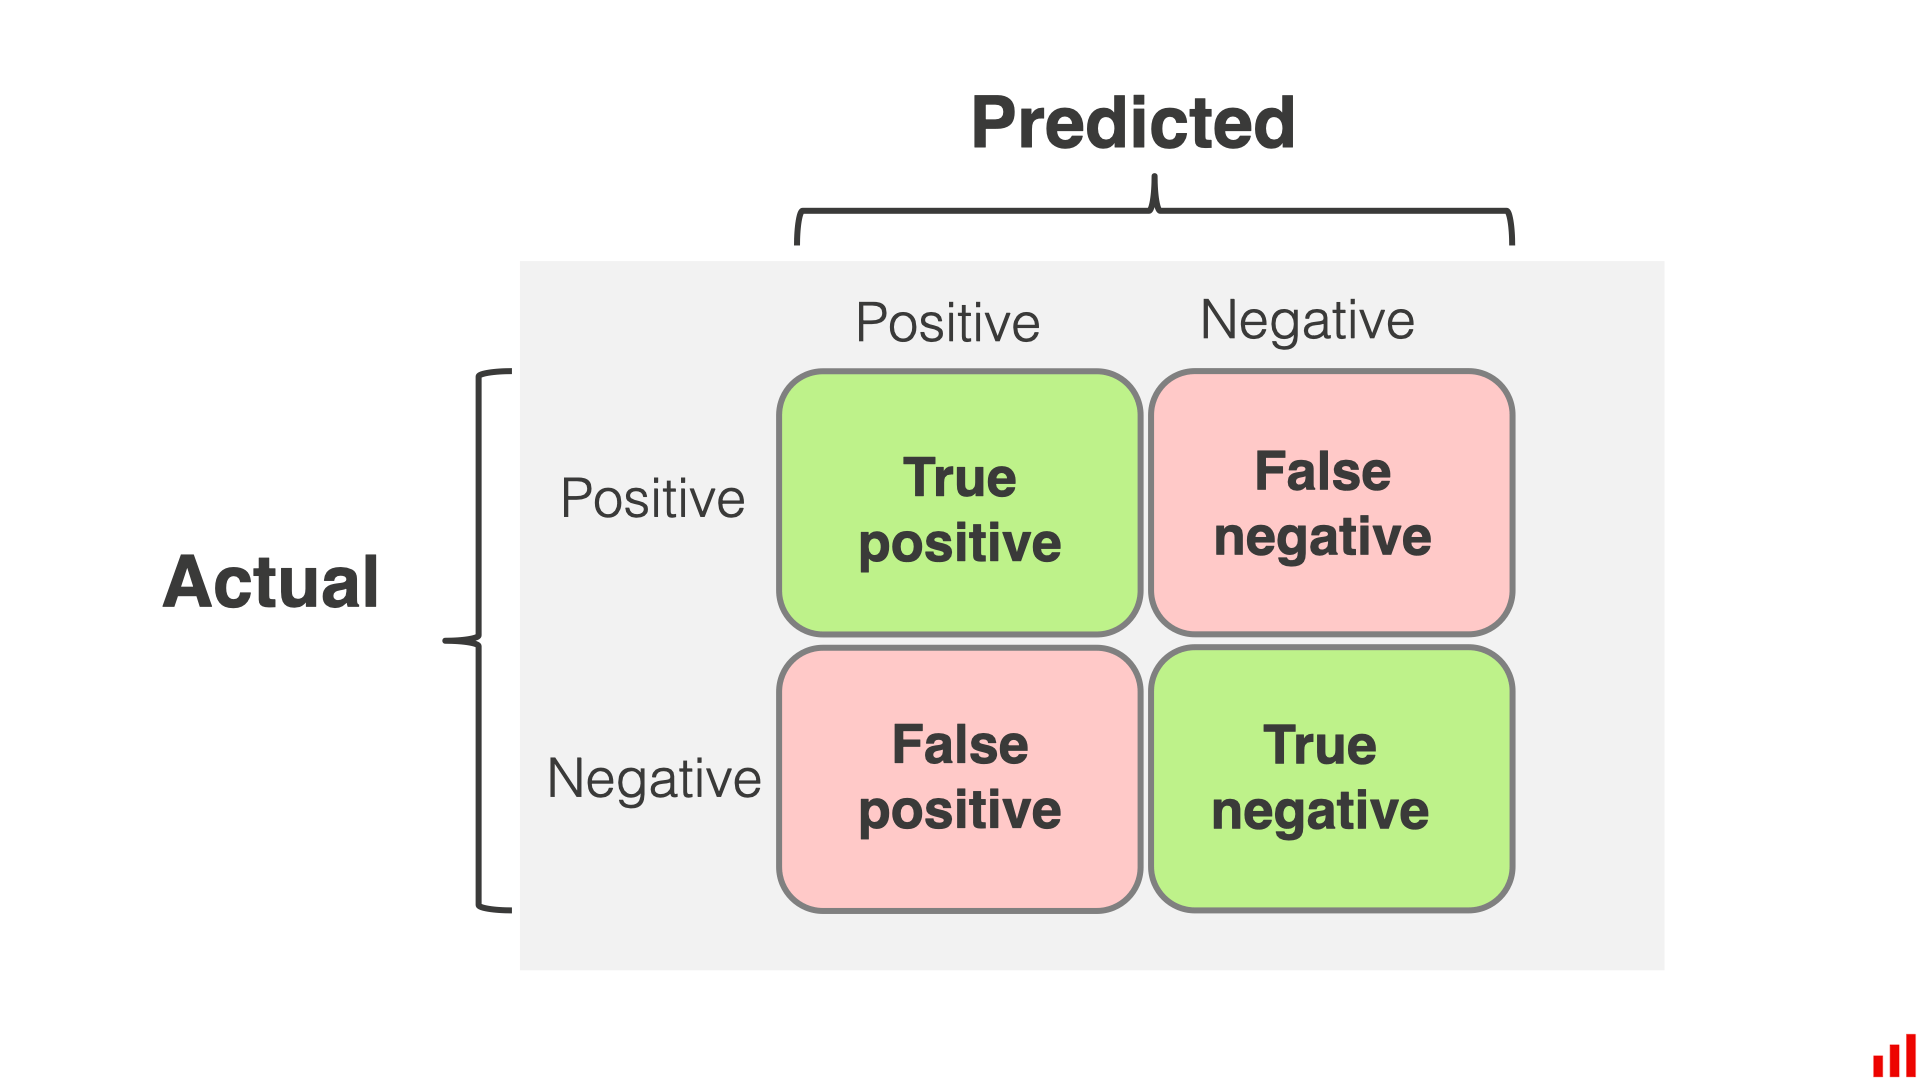

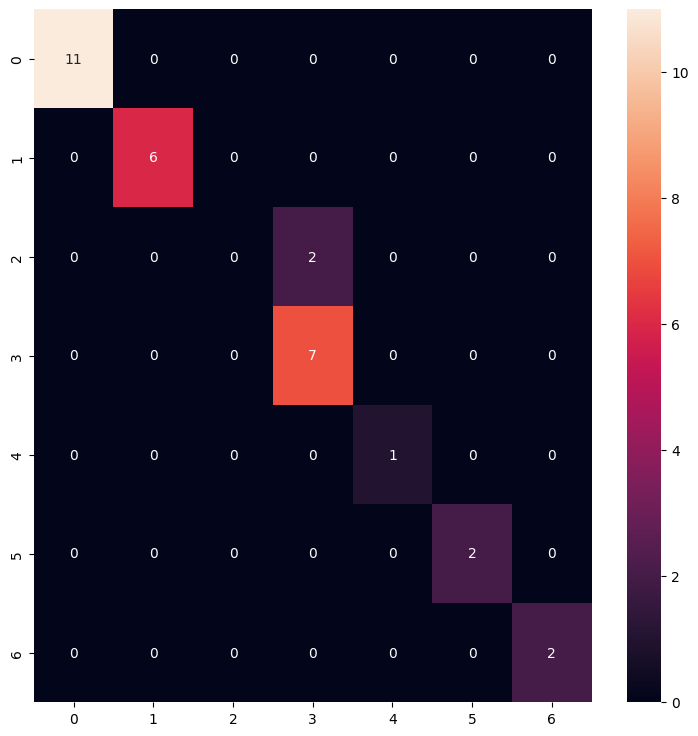

In [50]:
# visualize confusion matrix with seaborn heatmap
sns.heatmap(confusion_matrix(y_test,pred), annot=True,  fmt='.0f')
plt.show()

In [36]:
# NOW WITH K=3
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=3


[[11  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  2]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         6
           3       0.00      0.00      0.00         2
           4       0.78      1.00      0.88         7
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.94        31
   macro avg       0.83      0.86      0.84        31
weighted avg       0.89      0.94      0.91        31



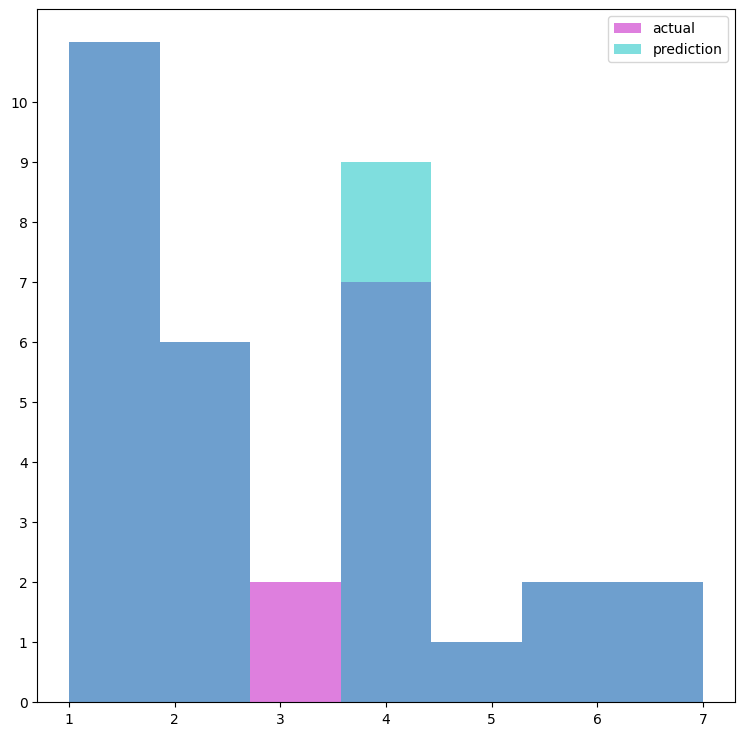

In [37]:
plt.rcParams['figure.figsize'] = (9,9)
_, ax = plt.subplots()
ax.hist(y_test, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(pred, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc = 'best')
plt.show()

# FINAL CONCLUSION



- frist data is visualize and found out scaling was required
- then standard scaling was applied
- and optimal no of k found using grid search cv
- and optimal k = 3
- knn model was preapred
- predictions were analized
- and finally model is evaluated by using CONFUSION MATRIX and CLASSIFICATION REPORT